In [14]:
import requests
from fake_useragent import UserAgent
import re
from bs4 import BeautifulSoup

header = {
    'User-Agent':UserAgent().random,
    'referer': 'https://music.163.com/',
    'cookie':'_ntes_nnid=dc246d3f7c852e667effbee70a58ea2d,1582034057123; _ntes_nuid=dc246d3f7c852e667effbee70a58ea2d; vinfo_n_f_l_n3=3bcfd770f541c18e.1.0.1582034057199.0.1582034180544; _iuqxldmzr_=32; WM_TID=ixhaCOGMSMxARUFRFVZ%2BAhltuhHeicOW; JSESSIONID-WYYY=C6T77%2F%2FkSu3y86XUMNqFQVYsfhX7dgawErYuTNA%2BelPTEFwFtF01uJcdko9m8FVOOtYpsbbk2qPC2BfNkk4HTbgYMHuxXXIWewuvV9GONip8ODq0U%2FYHzBMflDwjKQjhe8aUm3rIuWQ7%2Ba2nmlOk62iWCq7kTt0S9kAOgCXlVccTsFC8%3A1587796699777; WM_NI=h3hjhTdhIOnvtyLO35SCn1f2c68RNydq4H0Q2JJwCqViROK8rvCygjjfHxHsdlg%2BbEZ3IF08%2Bt7llqNK1lsRCrD4DjteTtQbU3cFQ%2FFVkCMPYQ5jlSZOkT6l1tlCBXbDTG4%3D; WM_NIKE=9ca17ae2e6ffcda170e2e6ee89aa60edebc0b3f640abe78ea2c85e928f9e84f54fb1a7e197fb219392a38cc82af0fea7c3b92aaceda88beb60a8b887b0ed7eb8a784b0b23f919da2d2e53aa1eaf8b3cd73a8affca9b35bf2968698c27b96b79eb0ca34b2aa8d9ae662aaba8899cb79a8b4a9cce14f9aed87a7b334e9acf98def7b8e95ff8df25a81ae8cd5c762b8bb9c95d46a97edada7d425868aa5a4d05c9b8ffb8bef599a91a5b5b568f3aca4a4c154a29c9ca8b737e2a3',
}
# url = 'https://music.163.com/discover/playlist'
#  35的倍数
for j in range(10):
    url = 'https://music.163.com/discover/playlist/?order=hot&cat=%E5%85%A8%E9%83%A8&limit=35&offset='+str(j*35)
    response = requests.get(url,headers=header).text
    href_list = re.findall('<a title="(.*?)" href=" " class="msk"></ a>',response)
    for href_title in href_list:
        title = href_title[0]
        href = 'https://music.163.com'+href_title[1]
        response = requests.get(href,headers=header).text
        bs = BeautifulSoup(response,'lxml')
        lable = re.findall('标签：(.*?)，简介',response)
        if lable:
            lable=lable[0]
        else:
            lable='None'
        collect = re.findall('class="u-btni u-btni-fav " href="javascript:;">\n<i>\((.*?)\)</i>',response)[0]
        introduce = bs.find_all('p',{'id':'album-desc-more'})
        if introduce:
            introduce = re.sub('\s', '', bs.find_all('p', {'id': 'album-desc-more'})[0].text)
        else:
            introduce = 'None'
        transmit = re.findall('id="cnt_comment_count">(.*?)</span>\)</i></ a>',response)
        if transmit:
            transmit = re.findall('id="cnt_comment_count">(.*?)</span>\)</i></ a>', response)[0]
        else:
            transmit = 'None'
        num= re.findall('id="playlist-track-count">(.*?)</span>首歌</span>',response)[0]
        play_count = re.findall('>播放：<strong id="play-count" class="s-fc6">(.*?)</strong>次<',response)[0]
        with open('data/music_detail.csv','a+',encoding='utf-8') as f:
    # title 标题   lable-标签    collect -收藏   introduce-介绍  transmit-转发  num-歌曲数  play-count-播放数
            f.write(title+','+lable+','+collect+','+introduce+','+transmit+','+num+','+play_count+'\n')

In [6]:
import pandas as pd
df=pd.read_csv("data/music_detail1.csv",names=["title","lable","collect","introduce","transmit","num","play-count"])
df

,title,lable,collect,introduce,transmit,num,play-count
0,写一首特别的歌，让它陪伴着你走下去,华语、流行、伤感,1187,介绍：我明明只和你相处了几个月却像认识了你一辈子我要你知道在这个世界上总有一个人是等着你的不...,14,41,301369
1,［日系.热血］百炼的铜制城墙下，温柔仍存,日语、放松、ACG,284,介绍：炼铜大户爱罗娘，不为幺力女为谁狂？绅士大战铜警察，我与诸君共存亡！pid:58011095,19,38,21981
2,宅家听古典 静享惬意时光,古典,594,介绍：由马友友、IgorLevit、HAUSER、LukaŠulić、ThePianoGuy...,3,30,41473
3,民国忆事 |莺啼陌上人归去，花外疏钟送夕阳,华语、伤感、流行,1001,介绍：**韦莲司致胡适我们会像两条溪流，共同奔向一个山谷。**鲁迅致许广平我寄你的信，总要送...,13,21,112449
4,Dancing Time | 燃烧你的卡路里,欧美、舞曲、流行,2448,介绍：康忙艾维巴蒂嗨起来沉醉于音乐用舞蹈传递喜悦享受这瞬间的疯狂人生,14,36,186306
5,千里狗/陈阳/王巨星/en/要不要买菜/王泽科,None,96277,介绍：喉咙唱的沙哑，也吻不到你啊,391,261,4536595
6,『硬曲 硬不硬听了再说（蹦迪专用❗）』,电子、流行、酒吧,47221,介绍：蹦迪吗？集美。一定要听到高潮喔。如果更新的话就会更新二十多以上的歌希望能慢慢听下去。喜...,739,534,2954352
7,[欧美私人订制] 最懂你的欧美推荐 每日更新35首,欧美,192万,介绍：收藏专属于你的欧美日推每天和喜欢的欧美音乐不期而遇,18857,35,134980176
8,前奏秒杀一切（纯音乐）,治愈、运动、游戏,23503,介绍：从开头数都是激情澎湃的，从末尾数都是安静治愈的，希望大家喜欢哦！喜欢的小伙伴记得分享。,271,174,814101
9,伤感（片段）☹︎,流行、孤独、伤感,44216,介绍：国际标准抑郁症测试测试结果：重度抑郁测试说明根据测试结果，最近一周你的心理患了“重感冒...,339,198,1814647


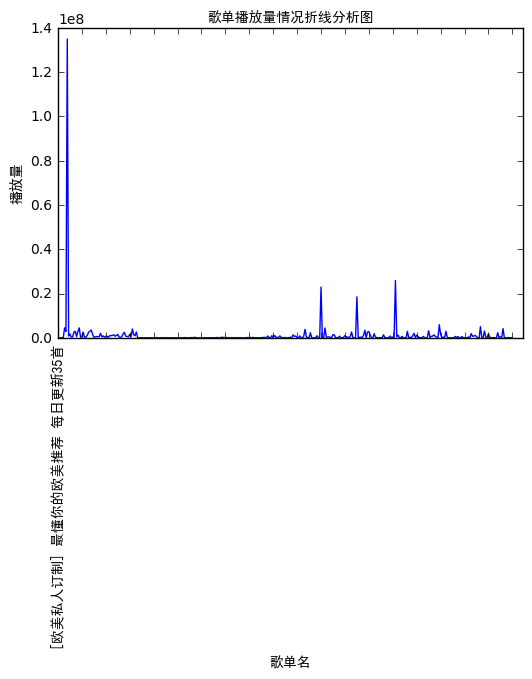

In [10]:
# 作业：
import numpy as np
import matplotlib.pyplot as plt
# 0、整体数据集None替换为np.nan
# df[df=="None"]=np.nan
# df
# # 1、对transmit-转发  num-歌曲数  play-count-播放数 数据进行清洗
# df["collect"]=df["collect"].str.replace('万',"0000")
# df1=df[df.transmit.notnull()]
# df1.transmit=df1.transmit.astype(int)
# df.loc[df[df.transmit.isnull()].index,"transmit"]=df1.transmit.mean()
# df
# # 2、统计分析
# #   以下图表要求必须有：标题、图例、坐标轴标签
# #   （1）歌单收藏量前15名的水平柱状分析图
# df.collect=df.collect.astype(int)
# df1=df.sort_values("collect",ascending=False).head(15)
# plt.bar(range(15),df1.collect,width=0.3,color="g")
# plt.xticks(range(15),list(df1.title),fontproperties="SimHei",rotation=90)
# plt.xlabel("歌单名",fontproperties="SimHei")
# plt.ylabel("收藏量",fontproperties="SimHei")
# plt.title("歌单收藏量前15名的水平柱状分析图",fontproperties="SimHei")
# plt.show()
# #   （2）歌单评论量前10的饼型分析图
# df.transmit=df.transmit.astype(int)
# df1=df.sort_values("transmit",ascending=False).head(10)
# list1=[]
# for i in df1.transmit.values:
#     list1.append(i/df1.transmit.sum())
# plt.pie(list1,labels=df1.title,autopct="%1.2f%%")
# plt.title("歌单评论量前10的饼型分析图",fontproperties="SimHei")
# # plt.legend(df1.title,loc="upper left")
# plt.rcParams["font.sans-serif"]=["SimHei"]
# plt.show()
# #   （3）歌单播放量情况，折线分析图
plt.plot(range(len(df)),df["play-count"])
plt.xticks(range(len(df))[::18],df1.title[::18],fontproperties="SimHei",rotation=90)
plt.xlabel("歌单名",fontproperties="SimHei")
plt.ylabel("播放量",fontproperties="SimHei")
plt.title("歌单播放量情况折线分析图",fontproperties="SimHei")
plt.show()

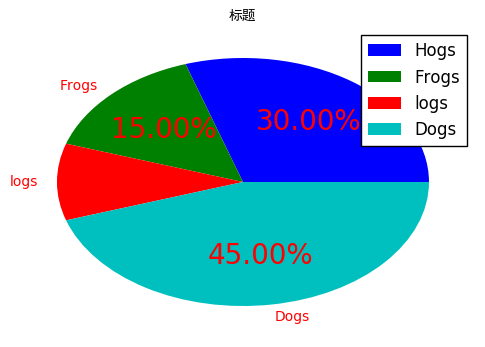

In [162]:
data=[30,15,10,45]
d_labels=["Hogs","Frogs","logs","Dogs"]
plt.pie(data,
        labels=d_labels,
        autopct="%1.2f%%",
        wedgeprops={'linewidth':0,'edgecolor':"w"},
        textprops={"fontsize":20,"color":"r"}
        )
plt.title("标题",fontproperties="SimHei")
plt.legend(d_labels,loc="best")
plt.show()